# Install 

In [9]:
!pip uninstall gglitely -y
!pip install git+https://github.com/seoyeonc/gglitely.git

Found existing installation: gglitely 0.0.1
Uninstalling gglitely-0.0.1:
  Successfully uninstalled gglitely-0.0.1
  Cloning https://github.com/seoyeonc/gglitely.git to /tmp/pip-req-build-uzdsgnil
  Running command git clone --filter=blob:none --quiet https://github.com/seoyeonc/gglitely.git /tmp/pip-req-build-uzdsgnil
  Resolved https://github.com/seoyeonc/gglitely.git to commit 86f5c00a4a8e40a05e5fdaa927296f50ff290b24
  Preparing metadata (setup.py) ... done
  Created wheel for gglitely: filename=gglitely-0.0.1-py3-none-any.whl size=2472 sha256=6493f1888b1b1e5cf6fe564720d21d58aaf411f02f4b201b23b8ecaf6ea230e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-vwtmxaeb/wheels/e0/8b/f8/39b2ecb602375107debcc614cb3dd48ee6c055295228b01c8e
Successfully built gglitely


  Cloning https://github.com/seoyeonc/gglitely.git to /tmp/pip-req-build-oq01adqp
  Running command git clone --filter=blob:none --quiet https://github.com/seoyeonc/gglitely.git /tmp/pip-req-build-oq01adqp


  Resolved https://github.com/seoyeonc/gglitely.git to commit 86f5c00a4a8e40a05e5fdaa927296f50ff290b24


  Preparing metadata (setup.py) ... -

 done


 done
  Created wheel for gglitely: filename=gglitely-0.0.1-py3-none-any.whl size=2472 sha256=3a897823d53127105e340f7657c37936b695bec5ac658c8533858ae4e2298802
  Stored in directory: /tmp/pip-ephem-wheel-cache-d30tsmth/wheels/e0/8b/f8/39b2ecb602375107debcc614cb3dd48ee6c055295228b01c8e
Successfully built gglitely


# Imports 

In [10]:
from gglitely import *

In [11]:
class gglitely(Figure):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.update_layout(template="plotly_white")
        self.update_layout(width=600, height=400)
    def __add__(self,geom):
        temp = gglitely(data=self.data, layout=self.layout, frames=self.frames)
        temp.add_trace(geom)
        return temp
    def __or__(self,other):
        n1 = len([key for key in self.layout if 'xaxis' in key])
        n2 = len([key for key in other.layout if 'xaxis' in key])
        if (n1<=1) and (n2<=1):
            temp = make_subplots(rows=1, cols=2)
            for geom in self.data:
                temp.add_trace(geom,row=1,col=1)
            for geom in other.data: 
                temp.add_trace(geom,row=1,col=2)
            temp = gglitely(data=temp.data, layout=temp.layout)            
            return temp
    def resize(self,width=600,height=400):
        self.update_layout(width=width, height=height)
        return self    

# 서브플랏 

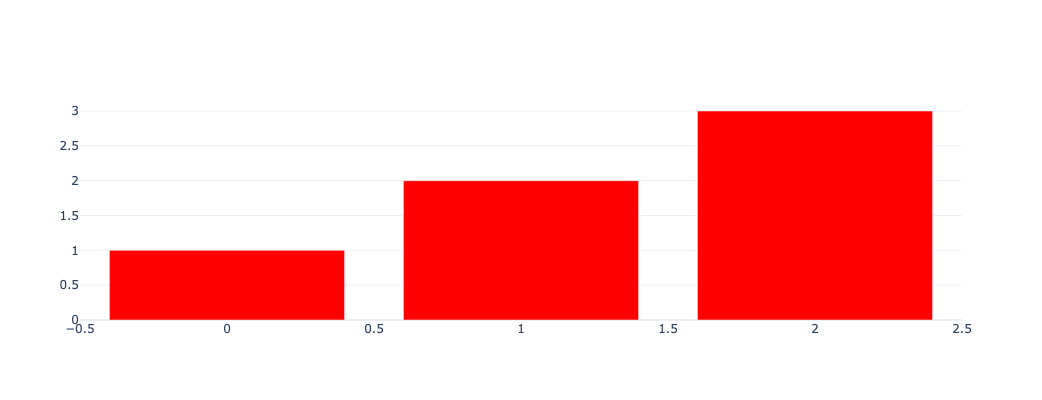

In [12]:
fig1 = gglitely() + bar(y=[1,2,3],col='red')
fig1

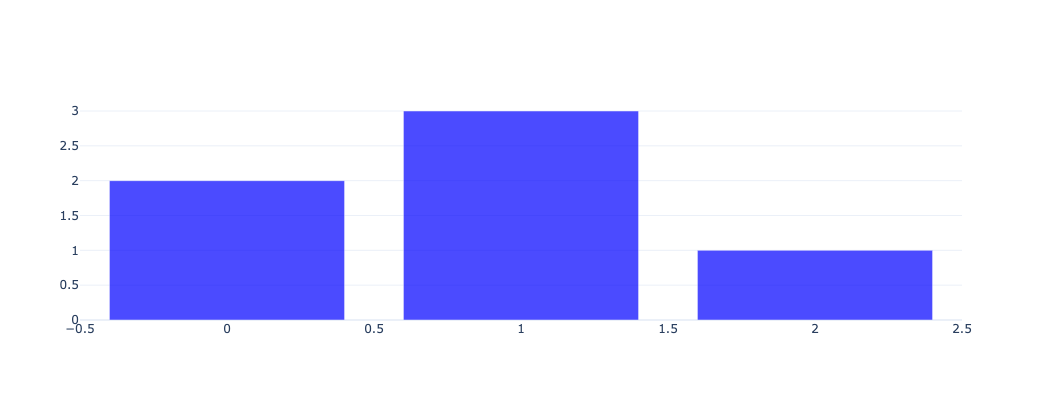

In [13]:
fig2 = gglitely() + bar(y=[2,3,1],alpha=0.7,col='blue')
fig2

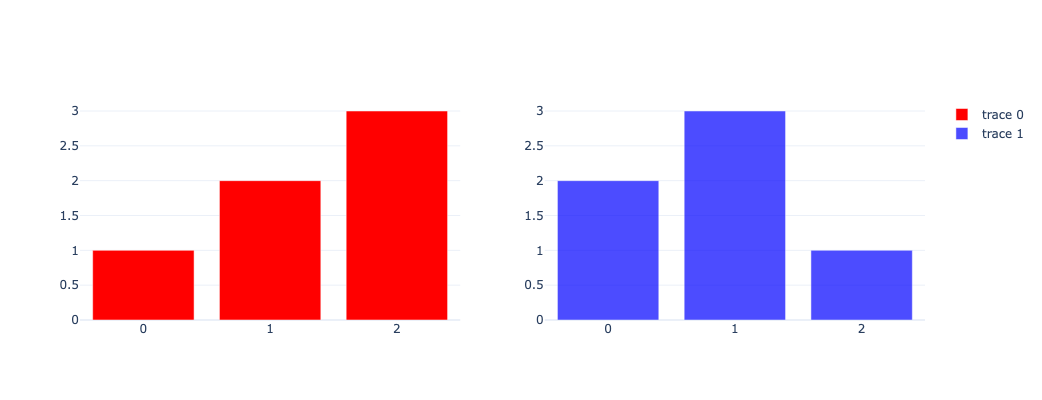

In [14]:
fig = fig1|fig2
fig